In [36]:
import pandas as pd
df=pd.read_excel("Projeçao-2025-2035.xlsx")
print(df)

     ANO  CÓD. SIGLA      LOCAL     POP_T     POP_H     POP_M     60+_T  \
0   2025    35    SP  São Paulo  46081801  22304147  23777654   8177572   
1   2026    35    SP  São Paulo  46179008  22344480  23834528   8434718   
2   2027    35    SP  São Paulo  46265834  22379708  23886126   8689383   
3   2028    35    SP  São Paulo  46343257  22410379  23932878   8941113   
4   2029    35    SP  São Paulo  46412204  22437020  23975184   9190771   
5   2030    35    SP  São Paulo  46473352  22460045  24013307   9439101   
6   2031    35    SP  São Paulo  46525604  22478968  24046636   9686487   
7   2032    35    SP  São Paulo  46567763  22493236  24074527   9933511   
8   2033    35    SP  São Paulo  46600148  22503069  24097079  10178962   
9   2034    35    SP  São Paulo  46622954  22508620  24114334  10423532   
10  2035    35    SP  São Paulo  46636153  22509940  24126213  10671202   

      60+_H    60+_M  ...    80+_M   P_60+_T   P_60+_H   P_60+_M   P_65+_T  \
0   3501222  4676350 

In [37]:
print(df[['ANO', 'POP_T', 'POP_M', 'POP_H']])
print(df.values[0])

     ANO     POP_T     POP_M     POP_H
0   2025  46081801  23777654  22304147
1   2026  46179008  23834528  22344480
2   2027  46265834  23886126  22379708
3   2028  46343257  23932878  22410379
4   2029  46412204  23975184  22437020
5   2030  46473352  24013307  22460045
6   2031  46525604  24046636  22478968
7   2032  46567763  24074527  22493236
8   2033  46600148  24097079  22503069
9   2034  46622954  24114334  22508620
10  2035  46636153  24126213  22509940
[2025 35 'SP' 'São Paulo' 46081801 22304147 23777654 8177572 3501222
 4676350 5727053 2390967 3336086 1120442 408562 711880 0.177457734345062
 0.0759784106528302 0.101479323692232 0.124280146949986 0.0518852767928927
 0.072394870157093 0.0243141972684618 0.00886601632605462
 0.0154481809424072]


In [38]:
# @title Texto de título padrão
#Proporção de idosos nos anos de 2026 à 2034
df1=df[df["ANO"]>=2021]
df1=df1[df1["SIGLA"]=="SP"]
#print(df1[["ANO", "SIGLA","POP_M"]])
VAR_M=[]
VAR_M65=[]
VAR_M.append(0)
VAR_M65.append(0)
PROP_M65=[]
x=(df1.iloc[0]["65+_M"]/df1.iloc[0]["POP_M"])*100
PROP_M65.append(x)
for i in range(1, len(df1)):
  var=(df1.iloc[i]["POP_M"]/df1.iloc[i-1]["POP_M"]-1)*100
  VAR_M.append(var)
  var=(df1.iloc[i]["65+_M"]/df1.iloc[i-1]["65+_M"]-1)*100
  VAR_M65.append(var)
  var=(df1.iloc[i]["65+_M"]/df1.iloc[i]["POP_M"])*100
  PROP_M65.append(var)

  #print(df1.iloc[i]["POP_M"])
df1["PROP_M65"]=PROP_M65
df1["VAR_M"]=VAR_M
df1["VAR_M65"]=VAR_M65
print(df1[["ANO", "SIGLA","POP_M","VAR_M","65+_M","VAR_M65", "PROP_M65"]])

     ANO SIGLA     POP_M     VAR_M    65+_M   VAR_M65   PROP_M65
0   2025    SP  23777654  0.000000  3336086  0.000000  14.030341
1   2026    SP  23834528  0.239191  3465128  3.868066  14.538270
2   2027    SP  23886126  0.216484  3595318  3.757148  15.051909
3   2028    SP  23932878  0.195729  3726591  3.651221  15.571011
4   2029    SP  23975184  0.176769  3858314  3.534678  16.092948
5   2030    SP  24013307  0.159010  3989835  3.408769  16.615100
6   2031    SP  24046636  0.138794  4120046  3.263569  17.133565
7   2032    SP  24074527  0.115987  4248187  3.110184  17.645983
8   2033    SP  24097079  0.093676  4373958  2.960581  18.151403
9   2034    SP  24114334  0.071606  4497609  2.826982  18.651185
10  2035    SP  24126213  0.049261  4619346  2.706705  19.146586


<BarContainer object of 11 artists>

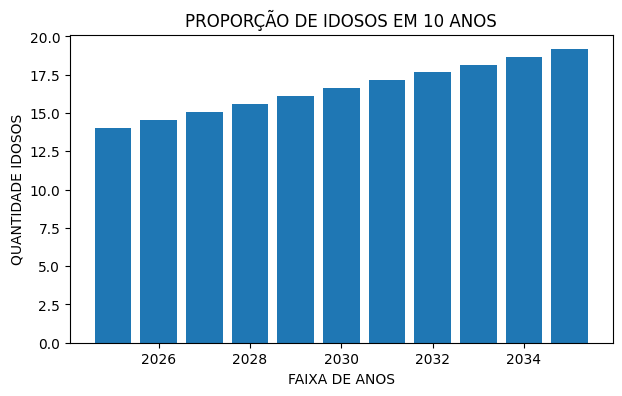

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(7,4))
plt.title("PROPORÇÃO DE IDOSOS EM 10 ANOS")
plt.xlabel("FAIXA DE ANOS")
plt.ylabel("QUANTIDADE IDOSOS")
plt.bar(df1["ANO"], df1['PROP_M65'])


In [40]:
#contagem
x=df[["ANO","65+_H","65+_M"]].groupby(by=["ANO"]).count().reset_index()
print(x)

     ANO  65+_H  65+_M
0   2025      1      1
1   2026      1      1
2   2027      1      1
3   2028      1      1
4   2029      1      1
5   2030      1      1
6   2031      1      1
7   2032      1      1
8   2033      1      1
9   2034      1      1
10  2035      1      1


In [41]:
# Trazendo média da população dos homens de 2025 à 2035
media_pop_h=df[["ANO","POP_H"]].groupby(by=["ANO"]).mean().reset_index()
print("Médias dos Homens daqui 10 anos")
print(media_pop_h)

Médias dos Homens daqui 10 anos
     ANO       POP_H
0   2025  22304147.0
1   2026  22344480.0
2   2027  22379708.0
3   2028  22410379.0
4   2029  22437020.0
5   2030  22460045.0
6   2031  22478968.0
7   2032  22493236.0
8   2033  22503069.0
9   2034  22508620.0
10  2035  22509940.0


In [42]:
# Trazendo  média da população das mulheres de 2025 à 2035
media_pop_m=df[["ANO","POP_M"]].groupby(by=["ANO"]).mean().reset_index()
print("Médias das mulheres daqui 10 anos")
print(media_pop_m)

Médias das mulheres daqui 10 anos
     ANO       POP_M
0   2025  23777654.0
1   2026  23834528.0
2   2027  23886126.0
3   2028  23932878.0
4   2029  23975184.0
5   2030  24013307.0
6   2031  24046636.0
7   2032  24074527.0
8   2033  24097079.0
9   2034  24114334.0
10  2035  24126213.0


In [43]:
# Trazendo média de homens idosos 65+ daqui 10 anos
media_65_h=df[["ANO","65+_H"]].groupby(by=["ANO"]).mean().reset_index()
print("Médias da população homens idosos 65+ daqui 10 anos")
print(media_65_h)

Médias da população homens idosos 65+ daqui 10 anos
     ANO      65+_H
0   2025  2390967.0
1   2026  2480301.0
2   2027  2570024.0
3   2028  2660251.0
4   2029  2750789.0
5   2030  2841479.0
6   2031  2931608.0
7   2032  3020713.0
8   2033  3108641.0
9   2034  3195851.0
10  2035  3282770.0


In [44]:
# Trazendo média de mulheres idosas 65+ daqui 10 anos
media_65_m=df[["ANO","65+_M"]].groupby(by=["ANO"]).mean().reset_index()
print("Médias da população mulheres idosos 65+ daqui 10 anos")
print(media_65_m)

Médias da população mulheres idosos 65+ daqui 10 anos
     ANO      65+_M
0   2025  3336086.0
1   2026  3465128.0
2   2027  3595318.0
3   2028  3726591.0
4   2029  3858314.0
5   2030  3989835.0
6   2031  4120046.0
7   2032  4248187.0
8   2033  4373958.0
9   2034  4497609.0
10  2035  4619346.0


In [45]:

#Listas de dados por anos, para depois pegar as médias dos idosos
faixasAno=["1-De 2025 a 2027","2-De 2028 a 2030","3-De 2031 a 2033","4-Até 2035"]
faixas=[]
for i in range(len(df)):
  if (int(df.iloc[i]["ANO"])<=2027):
    faixas.append(faixasAno[0])
  elif(int(df.iloc[i]["ANO"])<=2030):
    faixas.append(faixasAno[1])
  elif(int(df.iloc[i]["ANO"])<=2033):
    faixas.append(faixasAno[2])
  else:
    faixas.append(faixasAno[3])
print(faixas)

print(df)
df["FaixasANO"] = faixas
print(df)

['1-De 2025 a 2027', '1-De 2025 a 2027', '1-De 2025 a 2027', '2-De 2028 a 2030', '2-De 2028 a 2030', '2-De 2028 a 2030', '3-De 2031 a 2033', '3-De 2031 a 2033', '3-De 2031 a 2033', '4-Até 2035', '4-Até 2035']
     ANO  CÓD. SIGLA      LOCAL     POP_T     POP_H     POP_M     60+_T  \
0   2025    35    SP  São Paulo  46081801  22304147  23777654   8177572   
1   2026    35    SP  São Paulo  46179008  22344480  23834528   8434718   
2   2027    35    SP  São Paulo  46265834  22379708  23886126   8689383   
3   2028    35    SP  São Paulo  46343257  22410379  23932878   8941113   
4   2029    35    SP  São Paulo  46412204  22437020  23975184   9190771   
5   2030    35    SP  São Paulo  46473352  22460045  24013307   9439101   
6   2031    35    SP  São Paulo  46525604  22478968  24046636   9686487   
7   2032    35    SP  São Paulo  46567763  22493236  24074527   9933511   
8   2033    35    SP  São Paulo  46600148  22503069  24097079  10178962   
9   2034    35    SP  São Paulo  46622954

          FaixasANO         65+_H
0  1-De 2025 a 2027  2.480431e+06
1  2-De 2028 a 2030  2.750840e+06
2  3-De 2031 a 2033  3.020321e+06
3        4-Até 2035  3.239310e+06


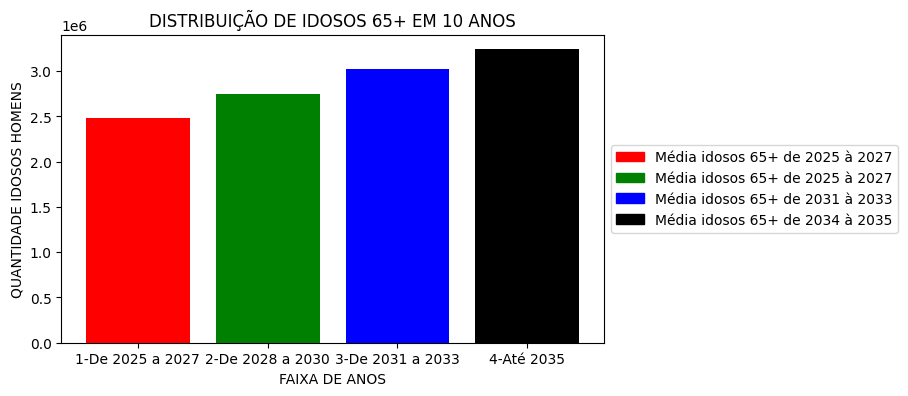

In [46]:
#Gráficos de Idosos 65+ por 10 anos
#Com o gráfico observa-se que haverá um aumento de idosos homens em média no ano de 2034 à 2035
# A média de homens 65% será de 3.239310e+06
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
dfQde=df[["FaixasANO","65+_H"]].groupby(by=["FaixasANO"]).mean().reset_index()
print(dfQde)
eixoX=dfQde["FaixasANO"]
eixoY=dfQde["65+_H"]
plt.figure(figsize=(7,4))
plt.title("DISTRIBUIÇÃO DE IDOSOS 65+ EM 10 ANOS")
plt.xlabel("FAIXA DE ANOS")
plt.ylabel("QUANTIDADE IDOSOS HOMENS")
plt.bar(eixoX,eixoY,color=["r","g","b","black"])
#Criando legenda de gráfico
vermelho_patch=mpatches.Patch(color="red",label='Média idosos 65+ de 2025 à 2027')
verde_patch=mpatches.Patch(color="green",label='Média idosos 65+ de 2025 à 2027')
azul_patch=mpatches.Patch(color="blue",label="Média idosos 65+ de 2031 à 2033")
preto_patch=mpatches.Patch(color="black",label="Média idosos 65+ de 2034 à 2035")
#Posicionando a legenda a direita do gráfico
plt.legend(handles=[vermelho_patch,verde_patch,azul_patch,preto_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


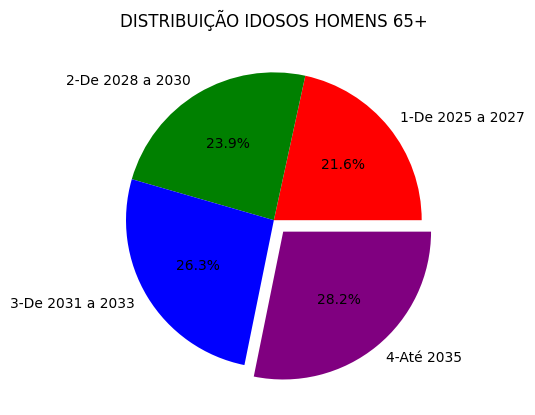

In [47]:
#Criando o gráfico em Pizza
#Em porcentagem destacou idosos 65+ 28,2% até 2035 anos
plt.title("DISTRIBUIÇÃO IDOSOS HOMENS 65+")
plt.pie(eixoY,explode=[0,0,0,0.1],colors=["r","g","b","purple"],labels=eixoX,
    autopct="%1.1f%%")
plt.show()

          FaixasANO         65+_M
0  1-De 2025 a 2027  3.465511e+06
1  2-De 2028 a 2030  3.858247e+06
2  3-De 2031 a 2033  4.247397e+06
3        4-Até 2035  4.558478e+06


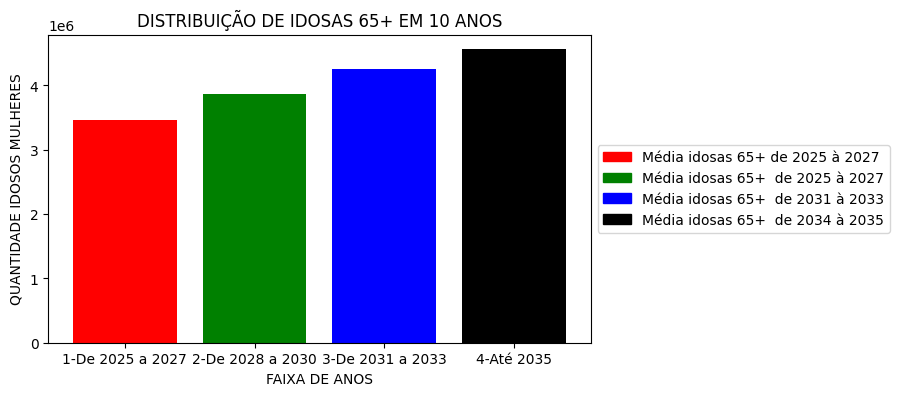

In [48]:
#Gráficos de Idosas 65+ por 10 anos
#Com o gráfico observa-se que haverá um aumento de idosas mulheres em média no ano de 2034 à 2035
# A média de mulheres 65% será de 4.558478e+06
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
dfQde=df[["FaixasANO","65+_M"]].groupby(by=["FaixasANO"]).mean().reset_index()
print(dfQde)
eixoX=dfQde["FaixasANO"]
eixoY=dfQde["65+_M"]
plt.figure(figsize=(7,4))
plt.title("DISTRIBUIÇÃO DE IDOSAS 65+ EM 10 ANOS")
plt.xlabel("FAIXA DE ANOS")
plt.ylabel("QUANTIDADE IDOSOS MULHERES")
plt.bar(eixoX,eixoY,color=["r","g","b","black"])
#Criando legenda de gráfico
vermelho_patch=mpatches.Patch(color="red",label='Média idosas 65+ de 2025 à 2027')
verde_patch=mpatches.Patch(color="green",label='Média idosas 65+  de 2025 à 2027')
azul_patch=mpatches.Patch(color="blue",label="Média idosas 65+  de 2031 à 2033")
preto_patch=mpatches.Patch(color="black",label="Média idosas 65+  de 2034 à 2035")
#Posicionando a legenda a direita do gráfico
plt.legend(handles=[vermelho_patch,verde_patch,azul_patch,preto_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()






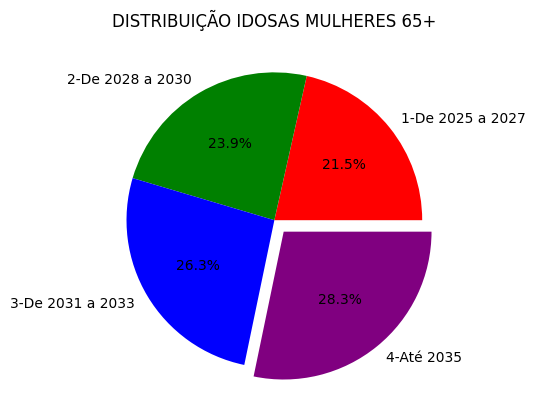

In [49]:
#Criando o gráfico em Pizza
#Em porcentagem destacou 28,3% de idosas 65+ até o ano de 2035%
plt.title("DISTRIBUIÇÃO IDOSAS MULHERES 65+")
plt.pie(eixoY,explode=[0,0,0,0.1],colors=["r","g","b","purple"],labels=eixoX,
    autopct="%1.1f%%")
plt.show()

          FaixasANO          80+_H
0  1-De 2025 a 2027  428949.000000
1  2-De 2028 a 2030  497189.666667
2  3-De 2031 a 2033  579016.666667
3        4-Até 2035  655252.000000


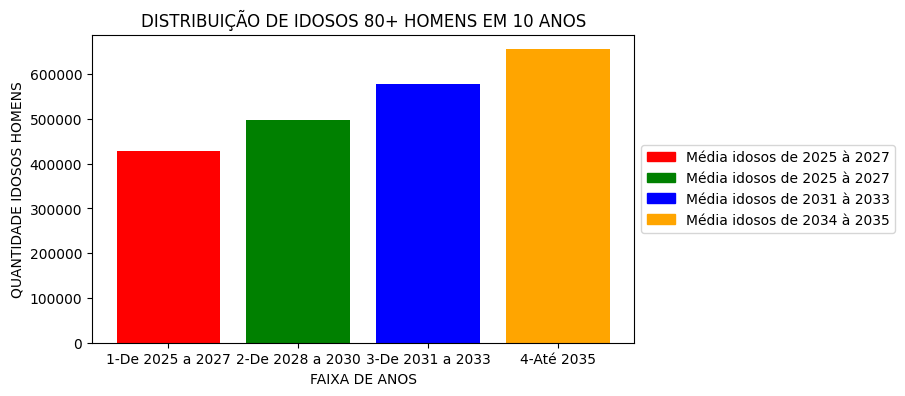

In [50]:
#Gráficos de Idosos Homens 80+ em 10 anos
#Com o gráfico observa-se que haverá um aumento de idosos 80+ em média no ano de 2034 à 2035
# A média de homens 80+ será de 655252.000000
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
dfQde=df[["FaixasANO","80+_H"]].groupby(by=["FaixasANO"]).mean().reset_index()
print(dfQde)
eixoX=dfQde["FaixasANO"]
eixoY=dfQde["80+_H"]
plt.figure(figsize=(7,4))
plt.title("DISTRIBUIÇÃO DE IDOSOS 80+ HOMENS EM 10 ANOS" )
plt.xlabel("FAIXA DE ANOS")
plt.ylabel("QUANTIDADE IDOSOS HOMENS")
plt.bar(eixoX,eixoY,color=["r","g","b","orange"])
#Criando legenda de gráfico
vermelho_patch=mpatches.Patch(color="red",label='Média idosos de 2025 à 2027')
verde_patch=mpatches.Patch(color="green",label='Média idosos de 2025 à 2027')
azul_patch=mpatches.Patch(color="blue",label="Média idosos de 2031 à 2033")
laranja_patch=mpatches.Patch(color="orange",label="Média idosos de 2034 à 2035")
#Posicionando a legenda a direita do gráfico
plt.legend(handles=[vermelho_patch,verde_patch,azul_patch,laranja_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



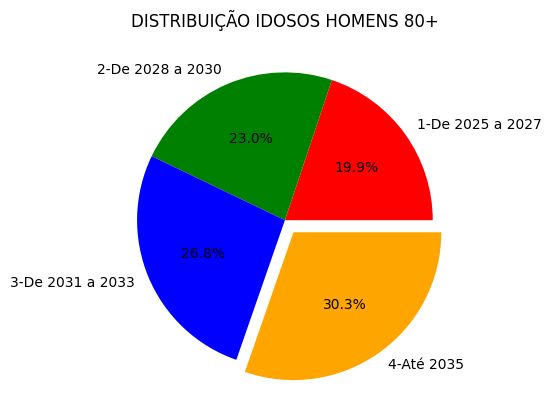

In [51]:
#Gráfico em Pizza idosos homens 80+

plt.title("DISTRIBUIÇÃO IDOSOS HOMENS 80+")
plt.pie(eixoY,explode=[0,0,0,0.1],colors=["r","g","b","orange"],labels=eixoX,
    autopct="%1.1f%%")
plt.show()#Em porcentagem destacou 30,3% de idosos 80+ até o ano de 2035

          FaixasANO         80+_M
0  1-De 2025 a 2027  7.443207e+05
1  2-De 2028 a 2030  8.565523e+05
2  3-De 2031 a 2033  9.940443e+05
3        4-Até 2035  1.125484e+06


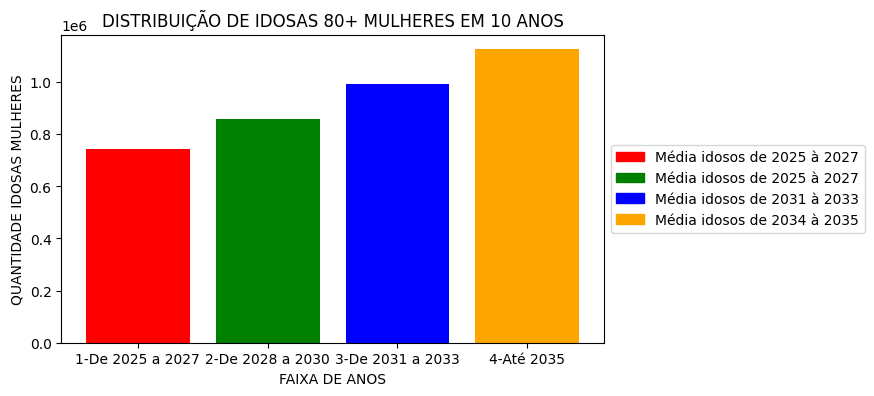

In [52]:
#Gráficos Geral de Idosas 80+ em 10 anos
#Com o gráfico observa-se que haverá um aumento de idosas 80+ em média no ano de 2034 à 2035
# A média de mulheres 80+ será de 1.125484e+06
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
dfQde=df[["FaixasANO","80+_M"]].groupby(by=["FaixasANO"]).mean().reset_index()
print(dfQde)
eixoX=dfQde["FaixasANO"]
eixoY=dfQde["80+_M"]
plt.figure(figsize=(7,4))
plt.title("DISTRIBUIÇÃO DE IDOSAS 80+ MULHERES EM 10 ANOS" )
plt.xlabel("FAIXA DE ANOS")
plt.ylabel("QUANTIDADE IDOSAS MULHERES")
plt.bar(eixoX,eixoY,color=["r","g","b","orange"])
#Criando legenda de gráfico
vermelho_patch=mpatches.Patch(color="red",label='Média idosos de 2025 à 2027')
verde_patch=mpatches.Patch(color="green",label='Média idosos de 2025 à 2027')
azul_patch=mpatches.Patch(color="blue",label="Média idosos de 2031 à 2033")
laranja_patch=mpatches.Patch(color="orange",label="Média idosos de 2034 à 2035")
#Posicionando a legenda a direita do gráfico
plt.legend(handles=[vermelho_patch,verde_patch,azul_patch,laranja_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

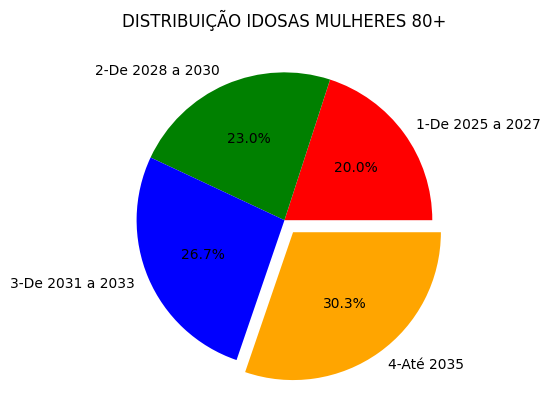

In [53]:
#Gráfico em Pizza idosas mulheres 80+
#Em porcentagem destacou 30,3% de idosas 80+ até o ano de 2035
plt.title("DISTRIBUIÇÃO IDOSAS MULHERES 80+")
plt.pie(eixoY,explode=[0,0,0,0.1],colors=["r","g","b","orange"],labels=eixoX,
    autopct="%1.1f%%")
plt.show()

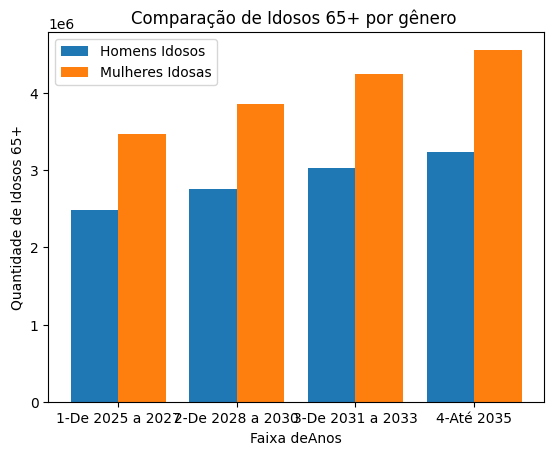

In [54]:
# Comparação de Idosos Homens e Mulheres 65+
#Neste gráfico observa-se que existirá mais mulheres idosas do que homens daqui 10 anos
import numpy as np
import matplotlib.pyplot as plt
dfQde = df[["FaixasANO", "65+_M", "65+_H"]].groupby(by=["FaixasANO"]).mean().reset_index()

X = dfQde["FaixasANO"]  # Faixa de Anos
Yidosos = dfQde["65+_H"]  # homens idosos
Zidosas = dfQde["65+_M"]  # mulheres idosas

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Yidosos, 0.4, label='Homens Idosos')
plt.bar(X_axis + 0.2, Zidosas, 0.4, label='Mulheres Idosas')

#Gráfico
plt.xticks(X_axis, X)
plt.xlabel("Faixa deAnos")
plt.ylabel("Quantidade de Idosos 65+")
plt.title("Comparação de Idosos 65+ por gênero ")
plt.legend()
plt.show()


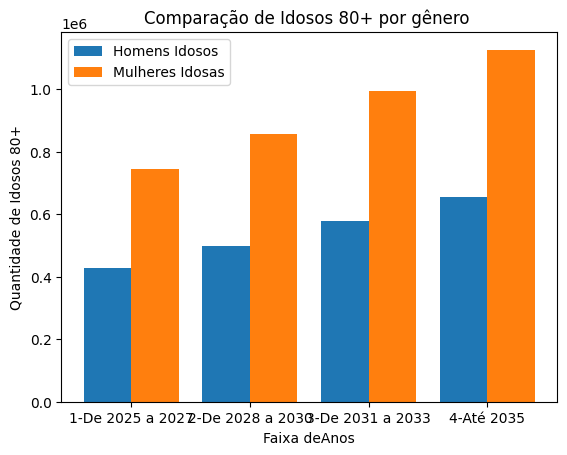

In [55]:
# Comparação de Idosos Homens e Mulheres 80+
#Neste gráfico observa-se que existirá mais mulheres idosas de 80+ do que homens daqui 10 anos

import numpy as np
import matplotlib.pyplot as plt
dfQde = df[["FaixasANO", "80+_M", "80+_H"]].groupby(by=["FaixasANO"]).mean().reset_index()

X = dfQde["FaixasANO"]  # Faixa de Anos
Yidosos = dfQde["80+_H"]  # homens idosos
Zidosas = dfQde["80+_M"]  # mulheres idosas

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Yidosos, 0.4, label='Homens Idosos')
plt.bar(X_axis + 0.2, Zidosas, 0.4, label='Mulheres Idosas')

#Gráfico
plt.xticks(X_axis, X)
plt.xlabel("Faixa deAnos")
plt.ylabel("Quantidade de Idosos 80+")
plt.title("Comparação de Idosos 80+ por gênero ")
plt.legend()
plt.show()